## Reducción de imagenes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u 
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
from matplotlib import colormaps

In [2]:
#Abrimos imagenes de ciencia, NGC6618, filtro B, 30 segundos
b1 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000520.fit')
b2 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000521.fit')
b3 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000522.fit')
b4 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000523.fit')
b5 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000524.fit')
b6 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000525.fit')
b7 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000526.fit')
b8 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000527.fit')
b9 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000528.fit')
b10 = fits.open('NGC_6618/20251002/filtroB/V462_B_30.000secs_00000530.fit')

b1[0].data

array([[ 87,  95,  91, ..., 100,  92,  89],
       [ 97, 105, 105, ...,  94,  95,  94],
       [ 92,  92,  94, ...,  93,  89,  78],
       ...,
       [ 95,  95,  91, ...,  95,  83,  81],
       [ 83,  84,  88, ...,  88,  85,  83],
       [ 87,  84, 101, ...,  89,  84,  93]], dtype=uint16)

In [3]:
#Abrimos imagenes de ciencia, NGC6618, filtro V, 30 segundos
v1 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000510.fit')
v2 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000511.fit')
v3 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000512.fit')
v4 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000513.fit')
v5 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000514.fit')
v6 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000515.fit')
v7 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000516.fit')
v8 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000517.fit')
v9 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000518.fit')
v10 = fits.open('NGC_6618/20251002/filtroV/V462_V_30.000secs_00000519.fit')

v1[0].data

array([[ 91,  83,  86, ...,  90,  88,  79],
       [ 98,  74, 108, ..., 106,  85,  87],
       [ 97,  91, 103, ...,  84,  92,  84],
       ...,
       [ 91,  97,  94, ...,  93,  90,  86],
       [ 82,  79,  82, ...,  84,  78,  78],
       [ 88,  97, 105, ...,  79,  77,  87]], dtype=uint16)

In [4]:
#Extraemos las imagenes filtro B
datab1 = b1[0].data
datab2 = b2[0].data
datab3 = b3[0].data
datab4 = b4[0].data
datab5 = b5[0].data
datab6 = b6[0].data
datab7 = b7[0].data
datab8 = b8[0].data
datab9 = b9[0].data
datab10 = b10[0].data

#Extraemos las imagenes filtro V
datav1 = v1[0].data
datav2 = v2[0].data
datav3 = v3[0].data
datav4 = v4[0].data
datav5 = v5[0].data
datav6 = v6[0].data
datav7 = v7[0].data
datav8 = v8[0].data
datav9 = v9[0].data
datav10 = v10[0].data

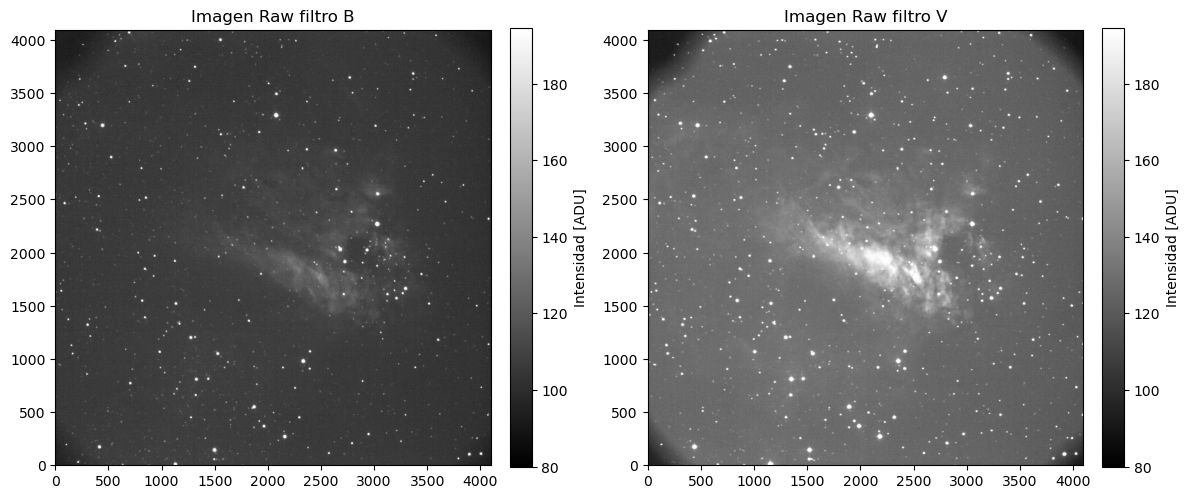

In [5]:
#Graficamos los primeros raw (imagenes)
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(datab1)
min_value,max_value=zscale.get_limits(datav1)

fig,ax=plt.subplots(1,2, figsize=(12,6))
rawb = ax[0].imshow(datab1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[0].set_title('Imagen Raw filtro B')
fig.colorbar(rawb, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
rawv = ax[1].imshow(datav1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[1].set_title('Imagen Raw filtro V')
fig.colorbar(rawv, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()

## Bias y Dark

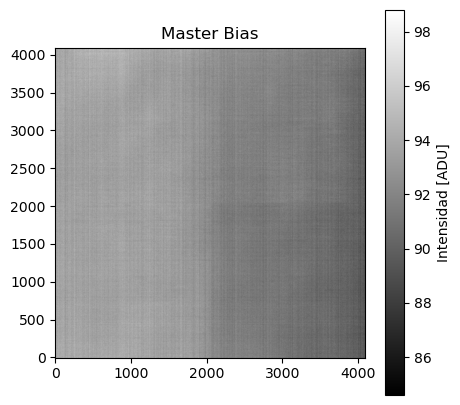

In [6]:
#extraemos los bias
bias1 = fits.open('NGC_6618/bias/Bias_1x1_00000494.fit')[0].data
bias2 = fits.open('NGC_6618/bias/Bias_1x1_00000495.fit')[0].data
bias3 = fits.open('NGC_6618/bias/Bias_1x1_00000496.fit')[0].data
bias4 = fits.open('NGC_6618/bias/Bias_1x1_00000497.fit')[0].data
bias5 = fits.open('NGC_6618/bias/Bias_1x1_00000498.fit')[0].data
bias6 = fits.open('NGC_6618/bias/Bias_1x1_00000499.fit')[0].data
bias7 = fits.open('NGC_6618/bias/Bias_1x1_00000500.fit')[0].data
bias8 = fits.open('NGC_6618/bias/Bias_1x1_00000501.fit')[0].data
bias9 = fits.open('NGC_6618/bias/Bias_1x1_00000502.fit')[0].data
bias10 = fits.open('NGC_6618/bias/Bias_1x1_00000503.fit')[0].data


#Generamos el Master Bias
master_bias = np.mean([bias1,bias1,bias3,bias4,bias5,bias6,bias7,bias8,bias9,bias10],axis=0)
master_bias.shape

#Graficamos
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_bias)

plt.imshow(master_bias,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Bias')
plt.colorbar(label='Intensidad [ADU]')
plt.show()

In [7]:
#importamos los darks
dark1 = fits.open('NGC_6618/darks/Dark_100.000secs_00000484.fit')[0].data
dark2 = fits.open('NGC_6618/darks/Dark_100.000secs_00000485.fit')[0].data
dark3 = fits.open('NGC_6618/darks/Dark_100.000secs_00000486.fit')[0].data
dark4 = fits.open('NGC_6618/darks/Dark_100.000secs_00000487.fit')[0].data
dark5 = fits.open('NGC_6618/darks/Dark_100.000secs_00000488.fit')[0].data
dark6 = fits.open('NGC_6618/darks/Dark_100.000secs_00000489.fit')[0].data
dark7 = fits.open('NGC_6618/darks/Dark_100.000secs_00000490.fit')[0].data
dark8 = fits.open('NGC_6618/darks/Dark_100.000secs_00000491.fit')[0].data
dark9 = fits.open('NGC_6618/darks/Dark_100.000secs_00000492.fit')[0].data
dark10 = fits.open('NGC_6618/darks/Dark_100.000secs_00000493.fit')[0].data

#Master dark y dark current
master_dark100s = np.median([dark1,dark2,dark3,dark4,dark5,dark6,dark7,dark8,dark9,dark10],axis=0)
dark_current = np.mean([dark1 - master_bias,dark2 - master_bias,dark3 - master_bias,dark4 - master_bias,dark5 - master_bias,dark6 - master_bias,dark7 - master_bias,dark8 - master_bias,dark9 - master_bias,dark10 - master_bias],axis=0)/100

#aqui nuestro tiempo de exp de los darks son de 100 s, pero nuestras imagenes ciencia son de 30 s, asi que lo reescalamos
master_dark30s = master_bias + (dark_current * 30)


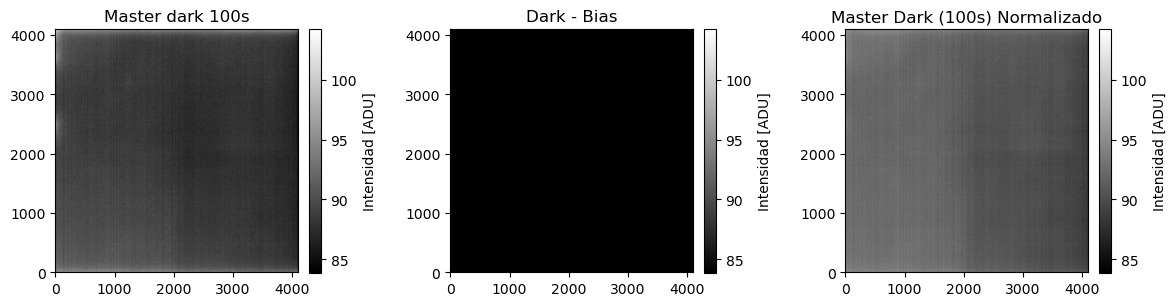

In [8]:
#Graficamos
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_dark100s)
min_value,max_value=zscale.get_limits(dark_current)
min_value,max_value=zscale.get_limits(master_dark30s)

fig,ax=plt.subplots(1,3, figsize=(12,4))
dark100s = ax[0].imshow(master_dark100s,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[0].set_title('Master dark 100s')
fig.colorbar(dark100s, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
current = ax[1].imshow(dark_current,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[1].set_title('Dark - Bias')
fig.colorbar(current, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
dark30s = ax[2].imshow(master_dark30s,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
ax[2].set_title('Master Dark (100s) Normalizado')
fig.colorbar(dark30s, ax=ax[2], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [9]:
#Flats y master flat filtro B

flatb1 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-001.fit')[0].data
flatb2 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-002.fit')[0].data
flatb3 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-003.fit')[0].data
flatb4 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-004.fit')[0].data
flatb5 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-005.fit')[0].data
flatb6 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-006.fit')[0].data
flatb7 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-007.fit')[0].data
flatb8 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-008.fit')[0].data
flatb9 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-009.fit')[0].data
flatb10 = fits.open('NGC_6618/Flats/flatB/FLAT_B_B11-010.fit')[0].data

#RESCALAMOS A 10 SEGUNDOS y limpiamos los flats (hacemos esto pq nuestro master dark es de 100 segundos)
corrected_flats_b = [
    flatb1 - master_bias - dark_current * 10,
    flatb2 - master_bias - dark_current * 10,
    flatb3 - master_bias - dark_current * 10,
    flatb4 - master_bias - dark_current * 10,
    flatb5 - master_bias - dark_current * 10,
    flatb6 - master_bias - dark_current * 10,
    flatb7 - master_bias - dark_current * 10,
    flatb8 - master_bias - dark_current * 10,
    flatb9 - master_bias - dark_current * 10,
    flatb10 - master_bias - dark_current * 10
] 

#Master flat filtro b normalizado (rescalado)
master_flatb = np.mean(corrected_flats_b, axis=0)
master_flatb_norm = master_flatb / np.mean(master_flatb)

#Flats y master flat filtro V

flatv1 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-001.fit')[0].data
flatv2 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-002.fit')[0].data
flatv3 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-003.fit')[0].data
flatv4 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-004.fit')[0].data
flatv5 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-005.fit')[0].data
flatv6 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-006.fit')[0].data
flatv7 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-007.fit')[0].data
flatv8 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-008.fit')[0].data
flatv9 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-009.fit')[0].data
flatv10 = fits.open('NGC_6618/Flats/flatV/FLAT_V_B11-010.fit')[0].data

#flats corregidos y reescalados
corrected_flats_v = [
    flatv1 - master_bias - dark_current * 10,
    flatv2 - master_bias - dark_current * 10,
    flatv3 - master_bias - dark_current * 10,
    flatv4 - master_bias - dark_current * 10,
    flatv5 - master_bias - dark_current * 10,
    flatv6 - master_bias - dark_current * 10,
    flatv7 - master_bias - dark_current * 10,
    flatv8 - master_bias - dark_current * 10,
    flatv9 - master_bias - dark_current * 10,
    flatv10 - master_bias - dark_current * 10
]
#normalizamos master flat filto v
master_flatv = np.mean(corrected_flats_v, axis=0)
master_flatv_norm = master_flatv / np.mean(master_flatv)

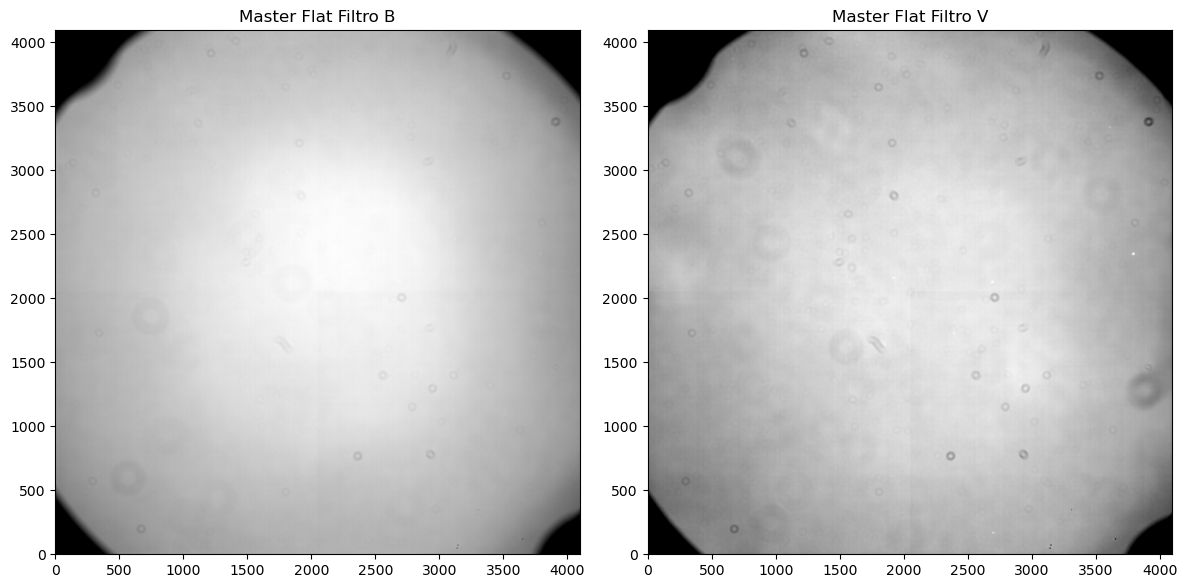

In [10]:
#Graficamos
zscale = ZScaleInterval(contrast=0.25)
min_b, max_b = zscale.get_limits(master_flatb_norm)
min_v, max_v = zscale.get_limits(master_flatv_norm)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(master_flatb_norm, vmin=min_b, vmax=max_b, cmap='gray', origin='lower')
ax[0].set_title('Master Flat Filtro B')
ax[1].imshow(master_flatv_norm, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[1].set_title('Master Flat Filtro V')


plt.tight_layout()
plt.show()

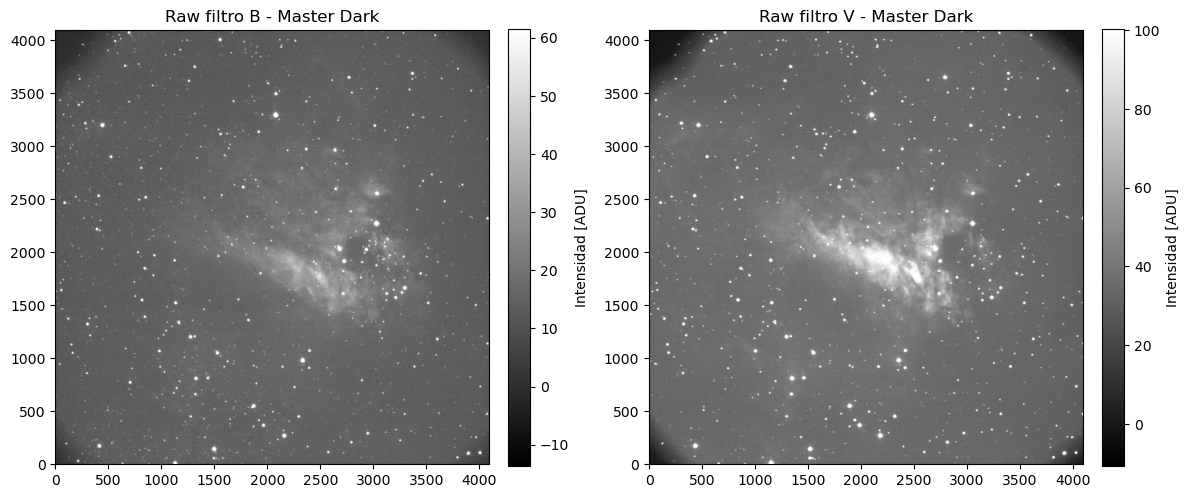

In [11]:
#Graficamos las primeras reducidas
zscale = ZScaleInterval(contrast=0.25)
min_b, max_b = zscale.get_limits(datab1-master_dark30s)
min_v, max_v = zscale.get_limits(datav1-master_dark30s)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

rb1 = ax[0].imshow(datab1-master_dark30s, vmin=min_b, vmax=max_b, cmap='gray', origin='lower')
ax[0].set_title('Raw filtro B - Master Dark')
fig.colorbar(rb1, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
rv1 = ax[1].imshow(datav1-master_dark30s, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[1].set_title('Raw filtro V - Master Dark')
fig.colorbar(rv1, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()


In [12]:
#Creamos las imagenes finales para cada filtro

img1b = (datab1-master_dark30s)/master_flatb_norm
img2b = (datab2-master_dark30s)/master_flatb_norm
img3b = (datab3-master_dark30s)/master_flatb_norm
img4b = (datab4-master_dark30s)/master_flatb_norm
img5b = (datab5-master_dark30s)/master_flatb_norm
img6b = (datab6-master_dark30s)/master_flatb_norm
img7b = (datab7-master_dark30s)/master_flatb_norm
img8b = (datab8-master_dark30s)/master_flatb_norm
img9b = (datab9-master_dark30s)/master_flatb_norm
img10b = (datab10-master_dark30s)/master_flatb_norm

img1v = (datav1-master_dark30s)/master_flatv_norm
img2v = (datav2-master_dark30s)/master_flatv_norm
img3v = (datav3-master_dark30s)/master_flatv_norm
img4v = (datav4-master_dark30s)/master_flatv_norm
img5v = (datav5-master_dark30s)/master_flatv_norm
img6v = (datav6-master_dark30s)/master_flatv_norm
img7v = (datav7-master_dark30s)/master_flatv_norm
img8v = (datav8-master_dark30s)/master_flatv_norm
img9v = (datav9-master_dark30s)/master_flatv_norm
img10v = (datav10-master_dark30s)/master_flatv_norm

bpm=fits.open('BPM.fit')[0].data

img_final_b = np.mean([img1b,img2b,img3b,img4b,img5b,img6b,img7b,img8b,img9b,img10b],axis=0)*bpm
img_final_v = np.mean([img1v,img2v,img3v,img4v,img5v,img6v,img7v,img8v,img9v,img10v],axis=0)*bpm

C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:3: RuntimeWarning: invalid value encountered in divide
  img1b = (datab1-master_dark30s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:4: RuntimeWarning: invalid value encountered in divide
  img2b = (datab2-master_dark30s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:5: RuntimeWarning: invalid value encountered in divide
  img3b = (datab3-master_dark30s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:6: RuntimeWarning: invalid value encountered in divide
  img4b = (datab4-master_dark30s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:7: RuntimeWarning: invalid value encountered in divide
  img5b = (datab5-master_dark30s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\3790266849.py:8: RuntimeWarning: invalid value encountered in divide
  img6b = (datab6-master_dark30s

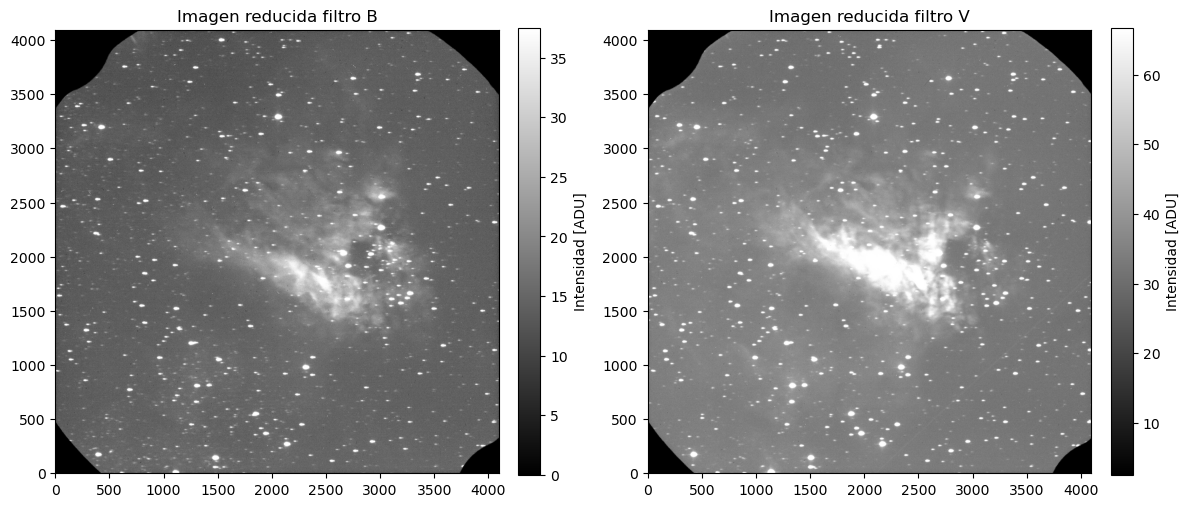

In [13]:
#Graficamos las primeras reducidas
zscale = ZScaleInterval(contrast=0.25)
min_b, max_b = zscale.get_limits(img_final_b)
min_v, max_v = zscale.get_limits(img_final_v)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

im_b = ax[0].imshow(img_final_b, vmin=min_b, vmax=max_b, cmap='gray', origin='lower')
ax[0].set_title('Imagen reducida filtro B')
fig.colorbar(im_b, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
im_v = ax[1].imshow(img_final_v, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[1].set_title('Imagen reducida filtro V')
fig.colorbar(im_v, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()


In [14]:
#Creación fits y astrometría

phdu = fits.PrimaryHDU(header = b1[0].header , data = img_final_b)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord = SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg))#Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Img_B.fits', overwrite = True)

In [15]:
phdu = fits.PrimaryHDU(header = v1[0].header , data = img_final_v)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Img_V.fits', overwrite = True)

In [16]:
#Vemos que informacion tiene el fits creado
test1 = fits.open('Img_B.fits')
test1[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{36922ce2-fadc-41

In [17]:
test2 = fits.open('Img_V.fits')
test2[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{7524519a-ed8c-4d

## Estrellas

In [18]:
#Subimos las imagenes de las estrellas
#HIP 116375
star1_1B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000557.fit')
star1_2B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000558.fit')
star1_3B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000559.fit')
star1_4B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000560.fit')
star1_5B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000561.fit')
star1_6B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000562.fit')
star1_7B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000563.fit')
star1_8B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000564.fit')
star1_9B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000565.fit')
star1_10B = fits.open('NGC_6618/Estrellas/HIP_116375/B/V462_B_5.000secs_00000566.fit')

star1_1V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000547.fit')
star1_2V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000548.fit')
star1_3V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000549.fit')
star1_4V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000550.fit')
star1_5V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000551.fit')
star1_6V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000552.fit')
star1_7V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000553.fit')
star1_8V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000554.fit')
star1_9V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000555.fit')
star1_10V = fits.open('NGC_6618/Estrellas/HIP_116375/V/V462_V_3.000secs_00000556.fit')

#HIP 117678
star2_1B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000592.fit')
star2_2B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000593.fit')
star2_3B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000594.fit')
star2_4B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000595.fit')
star2_5B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000596.fit')
star2_6B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000597.fit')
star2_7B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000598.fit')
star2_8B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000599.fit')
star2_9B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000600.fit')
star2_10B = fits.open('NGC_6618/Estrellas/HIP_117678/B/V462_B_5.000secs_00000601.fit')

star2_1V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000602.fit')
star2_2V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000603.fit')
star2_3V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000604.fit')
star2_4V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000605.fit')
star2_5V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000606.fit')
star2_6V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000607.fit')
star2_7V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000608.fit')
star2_8V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000609.fit')
star2_9V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000610.fit')
star2_10V = fits.open('NGC_6618/Estrellas/HIP_117678/V/V462_V_3.000secs_00000611.fit')

In [19]:
#Realizamos la reduccion de las estrellas del mismo modos que las imagen del objeto
#aqui nuestro tiemmpo de exp de los darks son de 100 s, pero nuestras imagenes de estrellas son de 5s para filtro b y 3s para filtro v, asi que lo reescalamos
master_dark5s = master_bias + (dark_current * 5)
master_dark3s = master_bias + (dark_current * 3)

#HIP 116375
red_star_1B_1 = (star1_1B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_2 = (star1_2B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_3 = (star1_3B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_4 = (star1_4B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_5 = (star1_5B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_6 = (star1_6B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_7 = (star1_7B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_8 = (star1_8B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_9 = (star1_9B[0].data-master_dark5s)/master_flatb_norm
red_star_1B_10 = (star1_10B[0].data-master_dark5s)/master_flatb_norm

red_star_1V_1 = (star1_1V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_2 = (star1_2V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_3 = (star1_3V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_4 = (star1_4V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_5 = (star1_5V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_6 = (star1_6V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_7 = (star1_7V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_8 = (star1_8V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_9 = (star1_9V[0].data-master_dark3s)/master_flatv_norm
red_star_1V_10 = (star1_10V[0].data-master_dark3s)/master_flatv_norm

#HIP 117678
red_star_2B_1 = (star2_1B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_2 = (star2_2B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_3 = (star2_3B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_4 = (star2_4B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_5 = (star2_5B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_6 = (star2_6B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_7 = (star2_7B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_8 = (star2_8B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_9 = (star2_9B[0].data-master_dark5s)/master_flatb_norm
red_star_2B_10 = (star2_10B[0].data-master_dark5s)/master_flatb_norm

red_star_2V_1 = (star2_1V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_2 = (star2_2V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_3 = (star2_3V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_4 = (star2_4V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_5 = (star2_5V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_6 = (star2_6V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_7 = (star2_7V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_8 = (star2_8V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_9 = (star2_9V[0].data-master_dark3s)/master_flatv_norm
red_star_2V_10 = (star2_10V[0].data-master_dark3s)/master_flatv_norm


C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:7: RuntimeWarning: invalid value encountered in divide
  red_star_1B_1 = (star1_1B[0].data-master_dark5s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:8: RuntimeWarning: invalid value encountered in divide
  red_star_1B_2 = (star1_2B[0].data-master_dark5s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:9: RuntimeWarning: invalid value encountered in divide
  red_star_1B_3 = (star1_3B[0].data-master_dark5s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:10: RuntimeWarning: invalid value encountered in divide
  red_star_1B_4 = (star1_4B[0].data-master_dark5s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:11: RuntimeWarning: invalid value encountered in divide
  red_star_1B_5 = (star1_5B[0].data-master_dark5s)/master_flatb_norm
C:\Users\Valem\AppData\Local\Temp\ipykernel_1964\1759864806.py:

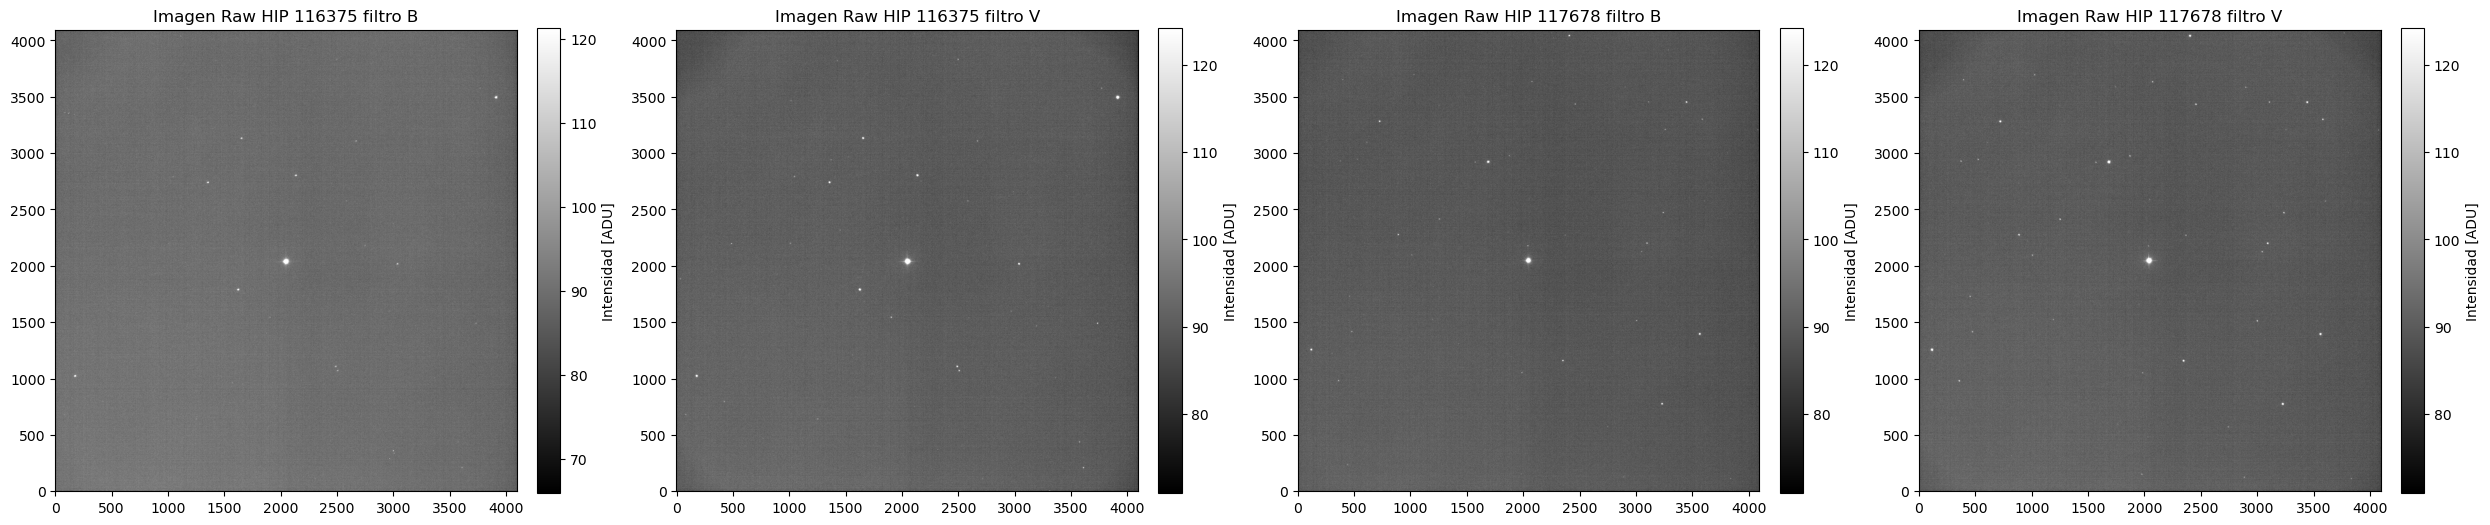

In [20]:
#Graficamos las primeras imagenes cientificas 
zscale = ZScaleInterval(contrast=0.25)
min_b, max_b = zscale.get_limits(star1_1B[0].data)
min_v, max_v = zscale.get_limits(star1_1V[0].data)
min_b, max_b = zscale.get_limits(star2_1B[0].data)
min_v, max_v = zscale.get_limits(star2_1V[0].data)

fig, ax = plt.subplots(1, 4, figsize=(25, 10))

HIP75B = ax[0].imshow(star1_1B[0].data, vmin=min_b, vmax=max_b, cmap='gray', origin='lower')
ax[0].set_title('Imagen Raw HIP 116375 filtro B')
fig.colorbar(HIP75B, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
HIP75V = ax[1].imshow(star1_1V[0].data, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[1].set_title('Imagen Raw HIP 116375 filtro V')
fig.colorbar(HIP75V, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
HIP78B = ax[2].imshow(star2_1B[0].data, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[2].set_title('Imagen Raw HIP 117678 filtro B')
fig.colorbar(HIP78B, ax=ax[2], label='Intensidad [ADU]', fraction=0.046, pad=0.04)
HIP78V = ax[3].imshow(star2_1V[0].data, vmin=min_v, vmax=max_v, cmap='gray', origin='lower')
ax[3].set_title('Imagen Raw HIP 117678 filtro V')
fig.colorbar(HIP78V, ax=ax[3], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [21]:
# Imágenes finales combinadas
final_star1B = np.mean([red_star_1B_1, red_star_1B_2, red_star_1B_3, red_star_1B_4, red_star_1B_5, red_star_1B_6, red_star_1B_7, red_star_1B_8, red_star_1B_9, red_star_1B_10], axis=0) * bpm
final_star1V = np.mean([red_star_1V_1, red_star_1V_2, red_star_1V_3, red_star_1V_4, red_star_1V_5, red_star_1V_6, red_star_1V_7, red_star_1V_8, red_star_1V_9, red_star_1V_10], axis=0) * bpm
final_star2B = np.mean([red_star_2B_1, red_star_2B_2, red_star_2B_3, red_star_2B_4, red_star_2B_5, red_star_2B_6, red_star_2B_7, red_star_2B_8, red_star_2B_9, red_star_2B_10], axis=0) * bpm
final_star2V = np.mean([red_star_2V_1, red_star_2V_2, red_star_2V_3, red_star_2V_4, red_star_2V_5, red_star_2V_6, red_star_2V_7, red_star_2V_8, red_star_2V_9, red_star_2V_10], axis=0) * bpm


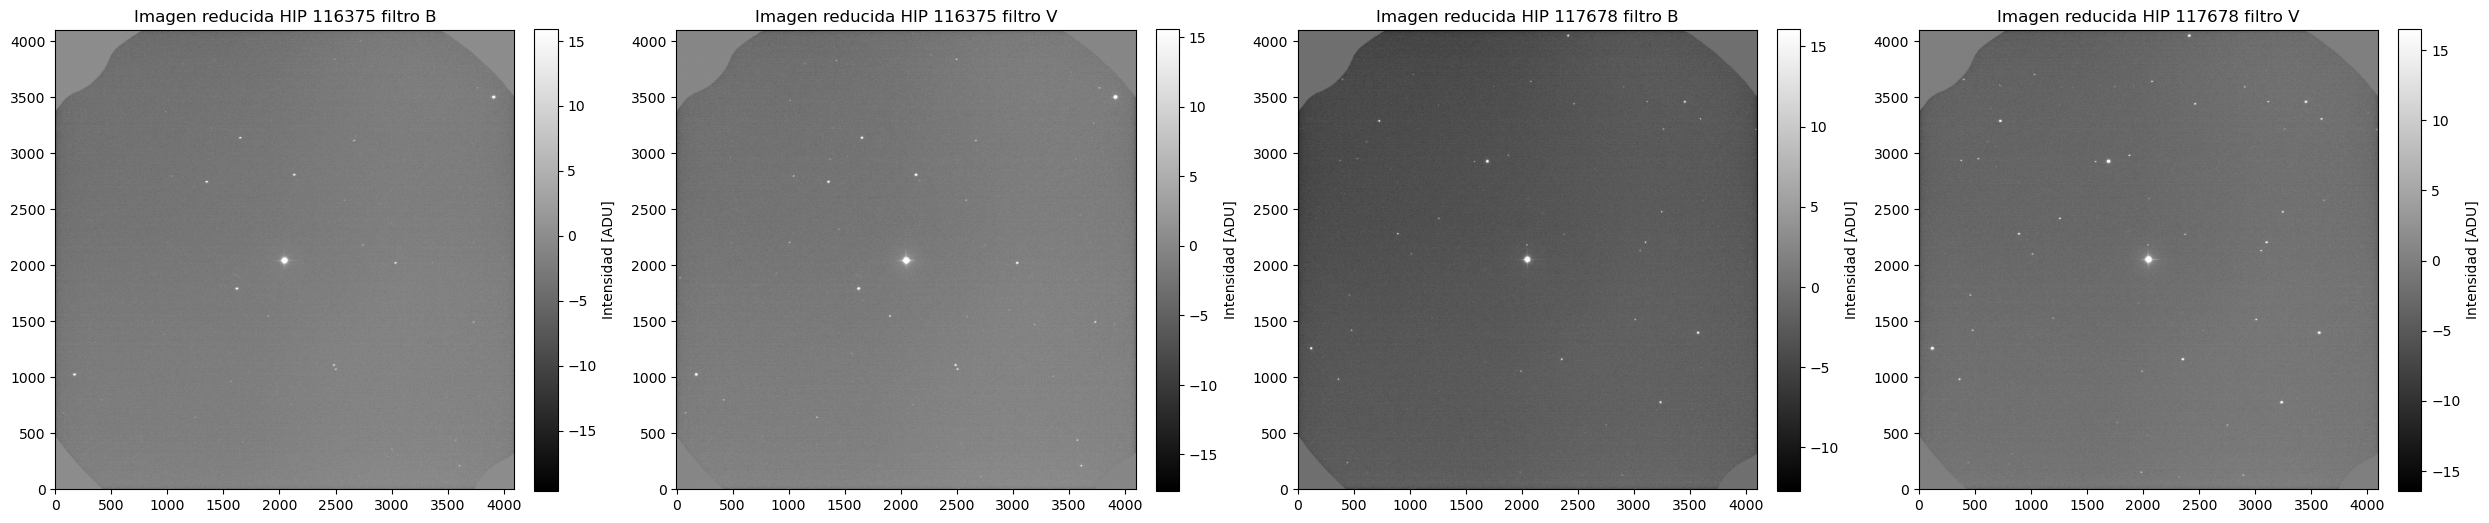

In [22]:
# Graficamos
zscale = ZScaleInterval(contrast=0.25)
min1B, max1B = zscale.get_limits(final_star1B)
min1V, max1V = zscale.get_limits(final_star1V)
min2B, max2B = zscale.get_limits(final_star2B)
min2V, max2V = zscale.get_limits(final_star2V)

# Figura con las 4 imágenes finales
fig, ax = plt.subplots(1, 4, figsize=(25, 10))

# HIP 116375
img1B = ax[0].imshow(final_star1B, vmin=min1B, vmax=max1B, cmap='gray', origin='lower')
ax[0].set_title('Imagen reducida HIP 116375 filtro B')
fig.colorbar(img1B, ax=ax[0], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

img1V = ax[1].imshow(final_star1V, vmin=min1V, vmax=max1V, cmap='gray', origin='lower')
ax[1].set_title('Imagen reducida HIP 116375 filtro V')
fig.colorbar(img1V, ax=ax[1], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

# HIP 117678
img2B = ax[2].imshow(final_star2B, vmin=min2B, vmax=max2B, cmap='gray', origin='lower')
ax[2].set_title('Imagen reducida HIP 117678 filtro B')
fig.colorbar(img2B, ax=ax[2], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

img2V = ax[3].imshow(final_star2V, vmin=min2V, vmax=max2V, cmap='gray', origin='lower')
ax[3].set_title('Imagen reducida HIP 117678 filtro V')
fig.colorbar(img2V, ax=ax[3], label='Intensidad [ADU]', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [23]:
# HIP 116375
#Filtro V
phdu = fits.PrimaryHDU(header = star1_1B[0].header , data = final_star1B)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Star1_B.fits', overwrite = True)

#Filtro V

phdu = fits.PrimaryHDU(header = star1_1V[0].header , data = final_star1V)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Star1_V.fits', overwrite = True)



In [24]:
#HIP 117678
#Filtro B

phdu = fits.PrimaryHDU(header = star2_1B[0].header , data = final_star2B)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Star2_B.fits', overwrite = True)

#Filtro V

phdu = fits.PrimaryHDU(header = star2_1V[0].header , data = final_star2V)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f"{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}", unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Martinez, Oyarzo, Vargas'

phdu.writeto('Star2_V.fits', overwrite = True)